# Naive Bayes Classifier Algorithm

## E.g. 1: On Iris Dataset (Without Plot)

In [1]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

In [3]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
random_state=1)

In [4]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [6]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


## E.g. 2: On Social Media (Network) Ads Dataset

In [14]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computing
import numpy as np

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing sklearn for machine learning and data mining
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
# Load the Social Network Dataset CSV file
data = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the structure of the dataset
print(data.info())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


## Exploratory Data Analysis (EDA)
Perform EDA on the dataset, including checking for missing values, understanding the distribution of different variables, and visualizing relationships between variables.

Missing values in each column:
 User ID            0
Age                0
EstimatedSalary    0
Purchased          0
Gender_Female      0
Gender_Male        0
dtype: int64

Summary statistics for numerical columns:
             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


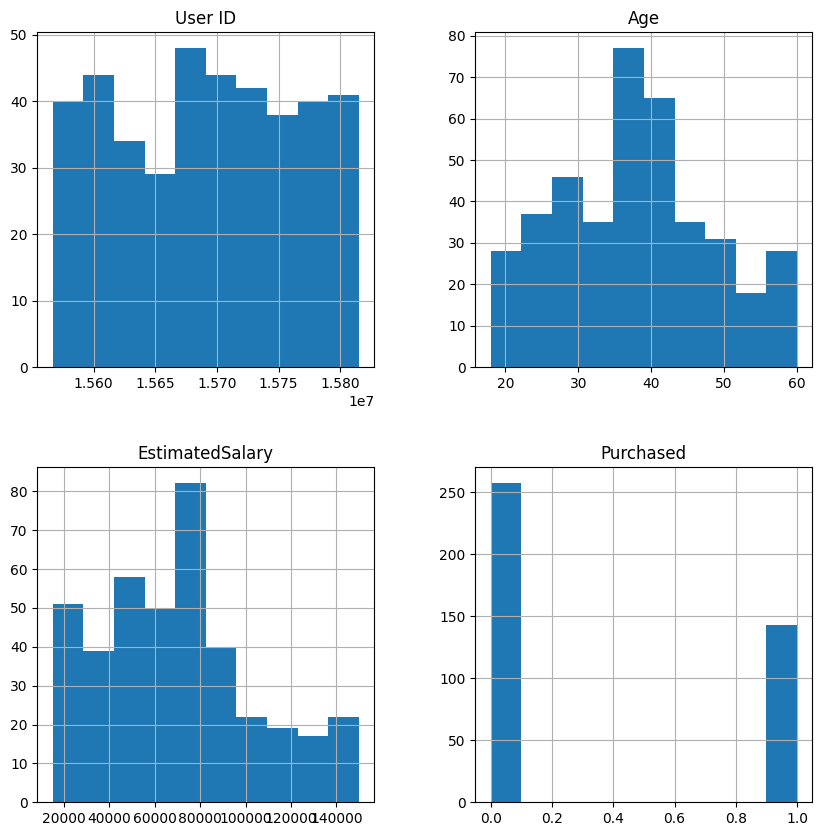

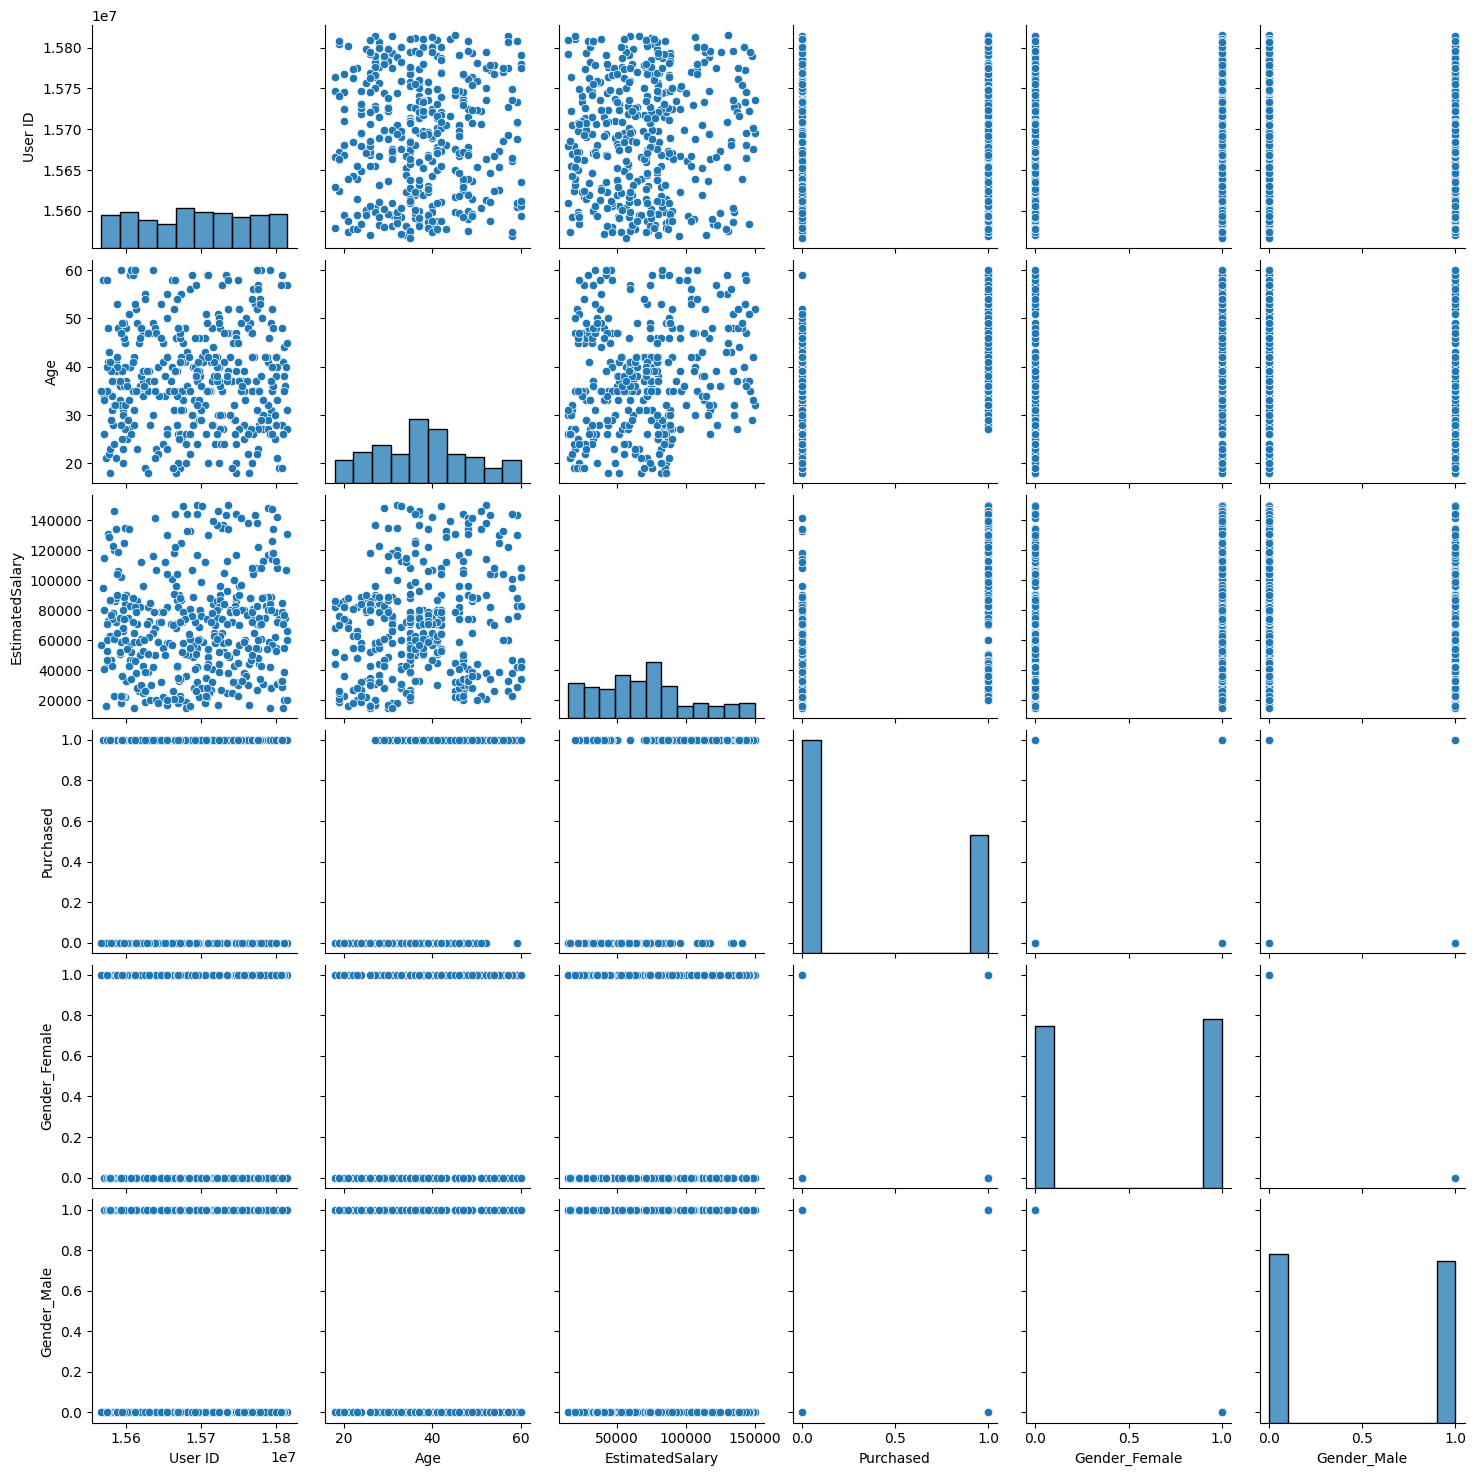

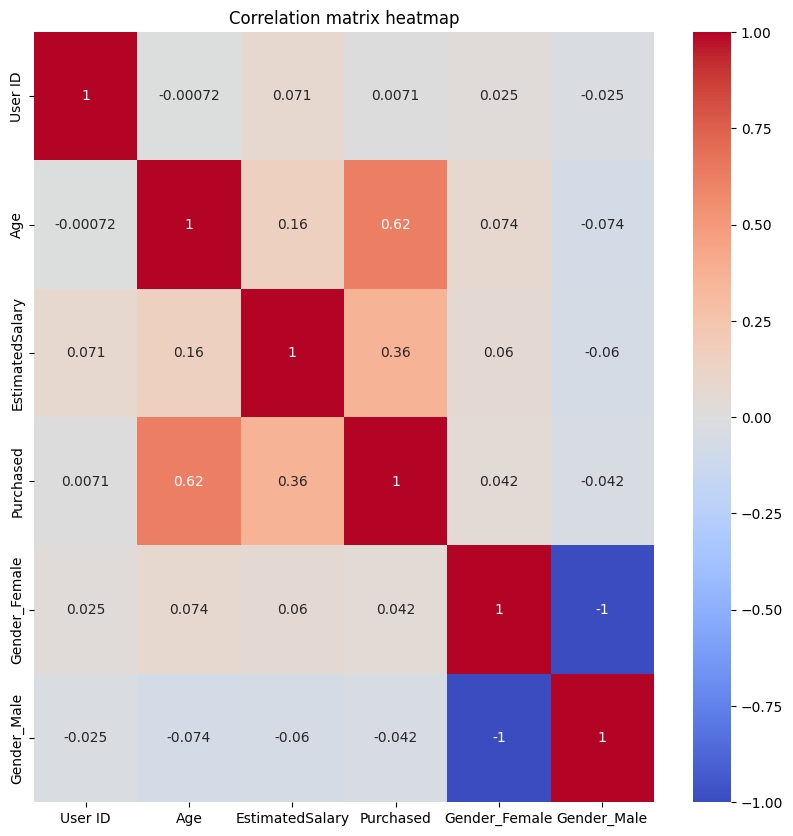

In [21]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:\n", data.describe())

# Visualizing the distribution of different variables
# Histograms for numerical columns
data.hist(figsize=(10,10))
plt.show()

# Visualizing relationships between variables
# Pairplot for numerical columns
sns.pairplot(data)
plt.show()

# Correlation matrix heatmap for numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix heatmap")
plt.show()

## Data Preprocessing
Preprocess the data by handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

In [23]:
# Handling missing values
# If there are any missing values, we will fill them with the most frequent value in each column
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Encoding categorical variables
# We will use pandas get_dummies function to convert categorical variable(s) into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into training and testing sets
# We will use 80% of the data for training and 20% of the data for testing
X = data.drop('Purchased', axis=1)  # Features
y = data['Purchased']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
# We will standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/tmp/ipykernel_7625/3511753621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
/tmp/ipykernel_7625/3511753621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [24]:
# Instantiate the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes.fit(X_train, y_train)

GaussianNB()